# Statistical Analysis of the Scooter Rental Service


## Let's analyze the data and test some hypotheses that may help the business grow.
To travel around the city, users of the GoFast service use a mobile app. The service can be used:

without a subscription
      
- no monthly fee;
- cost per minute — 8 RUB;
- ride start fee — 50 RUB;

with an Ultra subscription
      
- monthly fee — 199 RUB;
- cost per minute — 6 RUB;
- no ride start fee.

Hypotheses:

- We want to find out whether users with a subscription spend more time on rides than those without one. If so, the subscription may be beneficial for the company.

- We will test whether the average distance of a single ride among subscribers exceeds 3,130 meters. This is important for evaluating scooter wear and tear.

- We will compare the monthly revenue from users with and without a subscription to see if the subscription brings more money to the company.

- We will examine whether a server upgrade impacted the number of support requests — did the number decrease after the improvements?

- We will determine how many promo codes for a free subscription month need to be sent out to get at least 100 people to extend their subscription after the trial period.

- We will estimate the probability that no more than 399,500 users out of 11 million recipients will open a push notification.


# Data Loading


- Read data from files  
- Display information from the files  
- Examine the structure of columns and rows  
- Explore general information in each dataframe  


In [6]:
import sys
!{sys.executable} -m pip install scipy


In [7]:
# Add required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
import numpy as np
from scipy.stats import binom
from scipy.stats import norm

In [8]:
# Load data from datasets

try:
    users = pd.read_csv('')
    rides = pd.read_csv('')
    subscr = pd.read_csv('')
except:
    users = pd.read_csv('')
    rides = pd.read_csv('')
    subscr = pd.read_csv('')

In [9]:
# Display the first rows of each dataset

print(users.head().T)
print(rides.head().T)
print(subscr.head().T)


                        0          1        2               3      4
user_id                 1          2        3               4      5
name                 Кира  Станислав  Алексей      Константин  Адель
age                    22         31       20              26     28
city               Тюмень       Омск   Москва  Ростов-на-Дону   Омск
subscription_type   ultra      ultra    ultra           ultra  ultra
                   0            1           2            3            4
user_id            1            1           1            1            1
distance  4409.91914  2617.592153  754.159807  2694.783254  4028.687306
duration   25.599769    15.816871    6.232113       18.511    26.265803
date      2021-01-01   2021-01-18  2021-04-20   2021-08-11   2021-08-28
                      0      1
subscription_type  free  ultra
minute_price          8      6
start_ride_price     50      0
subscription_fee      0    199


In [10]:
# Check the data structure

print(users.info())
print(rides.info())
print(subscr.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns)

In [11]:
# View available data description

print(users.describe())
print('---')
print(rides.describe())
print('---')
print(subscr.describe())


           user_id          age
count  1565.000000  1565.000000
mean    762.633866    24.922045
std     443.260155     4.553496
min       1.000000    12.000000
25%     378.000000    22.000000
50%     762.000000    25.000000
75%    1146.000000    28.000000
max    1534.000000    43.000000
---
            user_id      distance      duration
count  18068.000000  18068.000000  18068.000000
mean     842.869936   3070.659976     17.805011
std      434.734317   1116.831209      6.091051
min        1.000000      0.855683      0.500000
25%      487.000000   2543.226360     13.597563
50%      889.000000   3133.609994     17.678395
75%     1213.250000   3776.222735     21.724800
max     1534.000000   7211.007745     40.823963
---
       minute_price  start_ride_price  subscription_fee
count      2.000000          2.000000          2.000000
mean       7.000000         25.000000         99.500000
std        1.414214         35.355339        140.714249
min        6.000000          0.000000          0

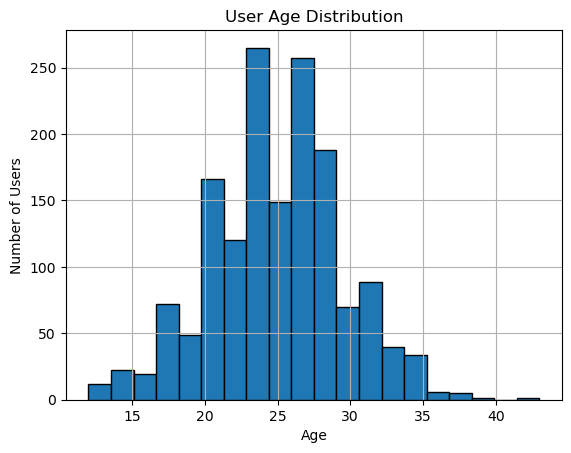

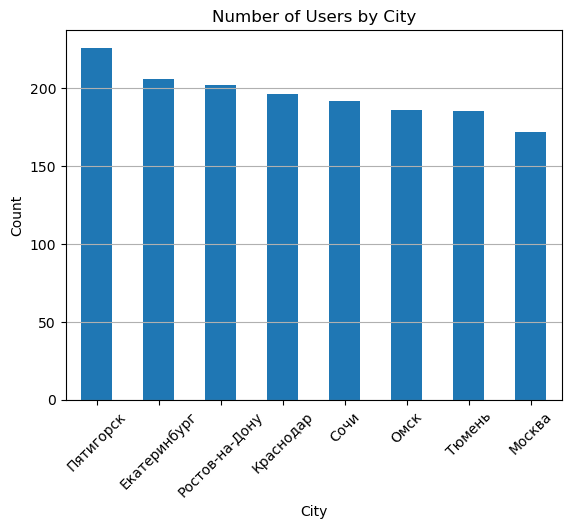

In [12]:
# Visualize the columns that can be visualized

# Users' age
users['age'].hist(bins=20, edgecolor='black')
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

# Distribution of users by city
users['city'].value_counts().plot(kind='bar')
plt.title('Number of Users by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


## Initial Insights on the Data

### 📁 1. Dataset `users` — user information

- Number of records: **1,565**
- No missing values
- Main fields: `user_id`, `name`, `age`, `city`, `subscription_type`

**Age statistics:**
- Average age: **24.9 years**
- Median: **25 years**
- Minimum: **12 years**, maximum: **43 years**
- Interquartile range: **22–28 years**

**Preliminary conclusions:**
- The service's audience is mostly young users

### 🚲 2. Dataset `rides` — ride information

- Number of records: **18,068**
- No missing values
- Main fields: `user_id`, `distance`, `duration`, `date`
- `date` is in string format (needs to be converted to `datetime`)

**Statistics:**
- Average distance: **3.07 km**
- Average ride duration: **17.8 minutes**
- Minimum values: ~0.86 km and 0.5 minutes
- Maximum values: ~7.2 km and 40.8 minutes

**Preliminary conclusions:**
- Rides are mostly short — the service is likely used for quick city travel
- There is variation in ride duration and distance, worth exploring the distribution

---

### 💳 3. Dataset `subscr` — subscription terms

- Number of records: **2**
- Main fields: `subscription_type`, `minute_price`, `start_ride_price`, `subscription_fee`

**Preliminary conclusions:**
- One type — with subscription (includes a `subscription_fee`, but cheaper rides)
- Another type — without subscription (no monthly fee, but rides are more expensive)


# Data Preprocessing


- Convert data types in the dataframes to appropriate formats (e.g., the date column)
- Create a new column with the month number based on the date column
- Check for missing values and duplicates in the dataframes
- Handle missing values and duplicates


In [16]:
# Convert the 'date' column in the rides dataset to datetime type

rides['date'] = pd.to_datetime(rides['date'])

# Round the 'distance' and 'duration' columns in rides to whole numbers
rides['distance'] = rides['distance'].round(0).astype(int)
rides['duration'] = np.ceil(rides['duration']).astype(int)
rides.head()



,user_id,distance,duration,date
0,1,4410,26,2021-01-01
1,1,2618,16,2021-01-18
2,1,754,7,2021-04-20
3,1,2695,19,2021-08-11
4,1,4029,27,2021-08-28


In [17]:
# Create a column with the month number in the rides dataset

rides['month'] = rides['date'].dt.month
rides.head()


,user_id,distance,duration,date,month
0,1,4410,26,2021-01-01,1
1,1,2618,16,2021-01-18,1
2,1,754,7,2021-04-20,4
3,1,2695,19,2021-08-11,8
4,1,4029,27,2021-08-28,8


In [18]:
# Check for missing values in the datasets

print(users.isna().sum())
print(rides.isna().sum())
print(subscr.isna().sum())


user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64
user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


In [19]:
# Count rides that are shorter than or equal to 100 meters
too_short = rides[rides['distance'] <= 100]
too_short['distance'].count()


np.int64(78)

In [20]:
# Check how many rides are shorter than 2 minutes, as such values might also be errors
too_less = rides[rides['duration'] <= 2]
too_less['duration'].count()


np.int64(95)

In [21]:
# Check for obvious duplicates

print(users.duplicated().sum())
print(rides.duplicated().sum())
print(subscr.duplicated().sum())


31
0
0


In [22]:
# Handle duplicates in the users dataset

users = users.drop_duplicates()
print(users['user_id'].duplicated().sum())
print(users.duplicated().sum())
print(rides.duplicated().sum())
print(subscr.duplicated().sum())


0
0
0
0


In [23]:
# Check for hidden duplicates

# Convert the 'name' and 'city' columns to lowercase and remove extra spaces
users['name'] = users['name'].str.strip().str.lower()
users['city'] = users['city'].str.strip().str.lower()

# Check for duplicates
print(users.duplicated().sum())


0


## Intermediate Conclusions on Data Preprocessing

### ✅ Missing Values
- All three datasets (`users`, `rides`, `subscr`) have **no missing values**
- All columns contain **complete data**, which simplifies further analysis

### 🧽 Duplicate Detection and Removal

- The `users` dataset contained **31 full duplicate rows**
  - They were successfully removed using `drop_duplicates()`
  - After that, we checked the uniqueness of `user_id` — no more duplicates
- No duplicates were found in the `rides` and `subscr` datasets

### 🔍 Handling Hidden Duplicates

- The `name` and `city` columns were standardized:
  - Extra spaces were removed
  - Text was converted to lowercase
- After this, duplicates were checked again — **no hidden duplicates were found**

### ✅ Unreliable Data
- Several dozen very short rides under 2 minutes were found
- Rides covering less than 100 meters were also found
- It was decided **not to remove** these borderline cases in order **not to distort revenue calculations**

### 📌 Conclusion:
- The data is clean: no missing values, no duplicates
- Columns are standardized — we can proceed to the next stage of analysis


# EDA

Let’s describe and visualize general information about users and rides:
- Frequency of cities
- Ratio of users with and without a subscription
- User age distribution
- Distance traveled per ride
- Ride duration


                user_id  name  age  subscription_type
city                                                 
пятигорск           219   219  219                219
екатеринбург        204   204  204                204
ростов-на-дону      198   198  198                198
краснодар           193   193  193                193
сочи                189   189  189                189
омск                183   183  183                183
тюмень              180   180  180                180
москва              168   168  168                168


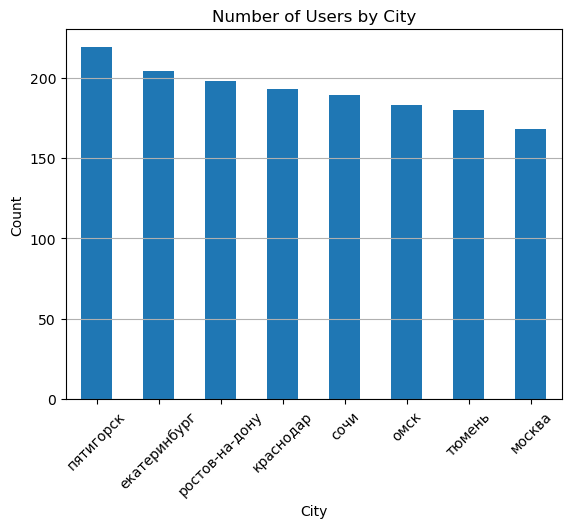

In [27]:
# Frequency of cities

# In numbers, sorted descending
city_friq = users.groupby(users['city']).count().sort_values(by='user_id', ascending=False)

print(city_friq)

# Visual representation
users['city'].value_counts().plot(kind='bar')
plt.title('Number of Users by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Users without subscription: 835
Users with subscription: 699
Without subscription: 54.43 % of users
With subscription: 45.57 % of users


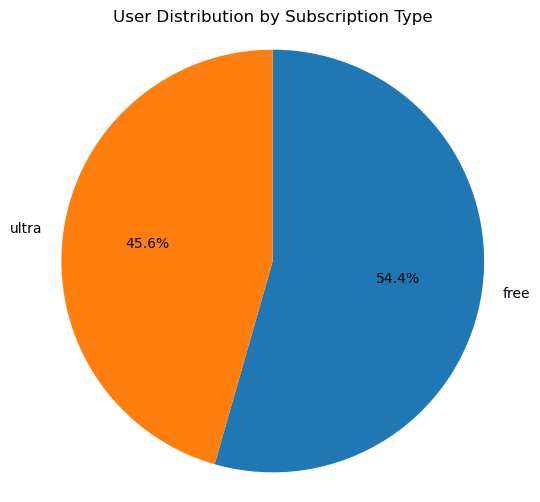

In [28]:
# Ratio of users with and without a subscription

# In numbers
proportion = users.groupby(users['subscription_type']).count()
proportion = proportion['user_id']
print(f'Users without subscription: {proportion.iloc[0]}')
print(f'Users with subscription: {proportion.iloc[1]}')

# In percentages
free = round(((proportion.iloc[0] / (proportion.iloc[1] + proportion.iloc[0])) * 100), 2)
ultra = 100 - free
print(f'Without subscription: {free} % of users')
print(f'With subscription: {ultra} % of users')

# Visual representation
import matplotlib.pyplot as plt

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    proportion, 
    labels=proportion.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    counterclock=False
)
plt.title('User Distribution by Subscription Type')
plt.axis('equal')  # Keep the pie circular
plt.show()



Age categories
age_group
<18       79
18–24    637
25–30    643
31–40    174
40+        1
Name: count, dtype: int64


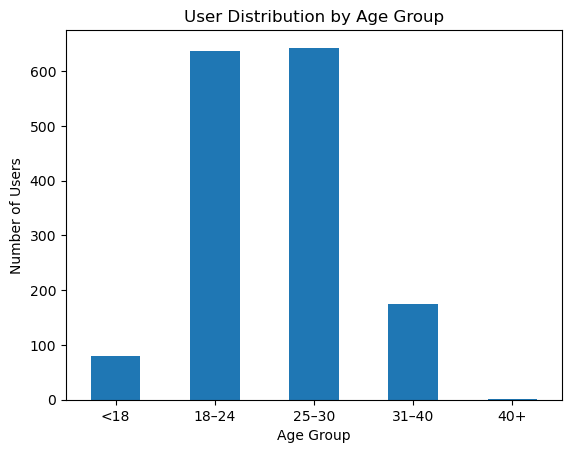

In [29]:
# Let's look at the distribution of users by age
# In numbers
bins = [0, 17, 24, 30, 40, 100]
labels = ['<18', '18–24', '25–30', '31–40', '40+']
users['age_group'] = pd.cut(users['age'], bins=bins, labels=labels)

# Frequency by age groups
print('Age categories')
print(users['age_group'].value_counts().sort_index())

# Visual representation
users['age_group'].value_counts().sort_index().plot(kind='bar')
plt.title('User Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.show()

Age distribution
age
25    145
24    132
26    131
23    129
22    119
27    119
28    112
21     93
20     71
29     68
30     68
31     48
19     47
18     46
32     41
33     39
17     26
16     19
34     19
35     15
15     13
14      9
13      8
36      6
12      4
38      3
37      2
39      1
43      1
Name: count, dtype: int64


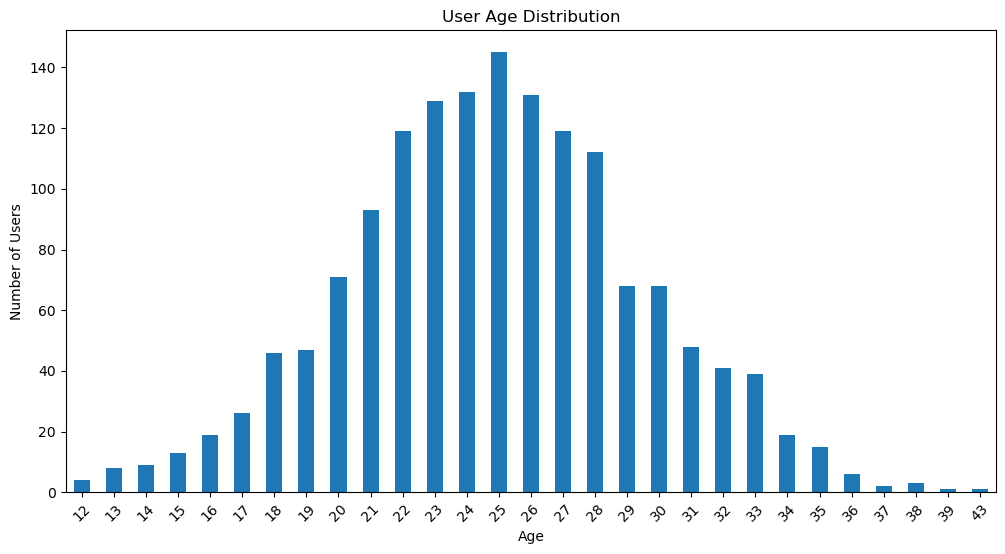

In [30]:
# Take another look at the distribution of user ages

# In numbers, without grouping
print('Age distribution')
print(users['age'].value_counts())

# Visual representation by individual ages
plt.figure(figsize=(12, 6))
users['age'].value_counts().sort_index().plot(kind='bar')

plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

count    18068.000000
mean      3070.659010
std       1116.832209
min          1.000000
25%       2543.000000
50%       3134.000000
75%       3776.000000
max       7211.000000
Name: distance, dtype: float64


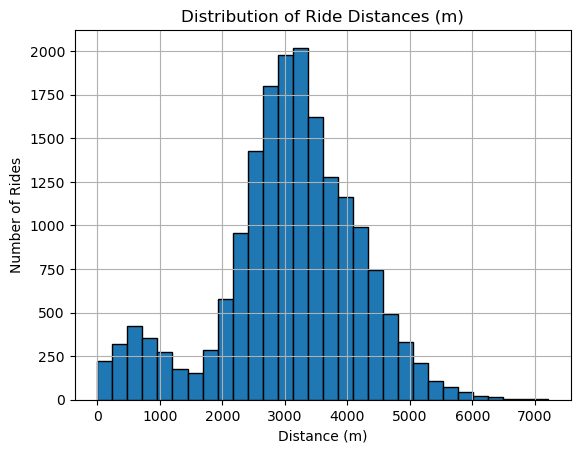

In [31]:
# Distance a user travels per ride

print(rides['distance'].describe())

# Ride distance distribution
rides['distance'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Ride Distances (m)')
plt.xlabel('Distance (m)')
plt.ylabel('Number of Rides')
plt.grid(True)
plt.show()


count    18068.000000
mean        18.303520
std          6.094928
min          1.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64


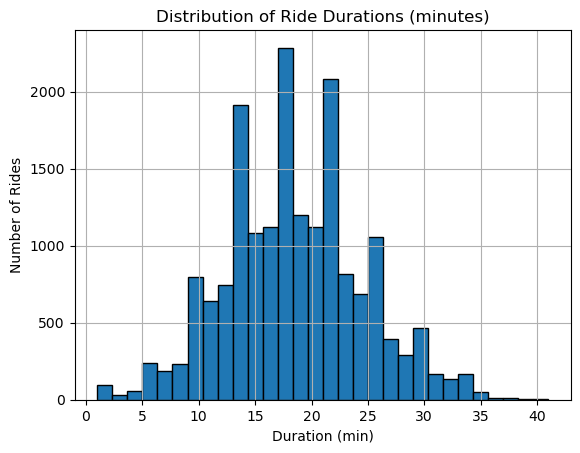

In [32]:
# Ride duration

print(rides['duration'].describe())

# Ride duration distribution
rides['duration'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Ride Durations (minutes)')
plt.xlabel('Duration (min)')
plt.ylabel('Number of Rides')
plt.grid(True)
plt.show()


## 🔍 Exploratory Data Analysis (EDA)

Let's describe and visualize general information about users and rides:

- 📍 City frequency
- 💳 Ratio of users with and without a subscription
- 👤 User age
- 📏 Distance traveled per ride
- ⏱ Ride duration

---

### 📍 City Frequency

#### Top cities by number of users:

| City              | Users         |
|-------------------|---------------|
| Pyatigorsk        | 219           |
| Yekaterinburg     | 204           |
| Rostov-on-Don     | 198           |
| Krasnodar         | 193           |
| Sochi             | 189           |
| Omsk              | 183           |
| Tyumen            | 180           |
| Moscow            | 168           |

#### Conclusion:
- The service is most popular in large and southern cities
- Pyatigorsk leads the list

---

### 💳 User Distribution by Subscription Type

- **Without subscription**: 835 users (≈54.43%)
- **With subscription**: 699 users (≈45.57%)

#### Conclusion:
- Nearly a 50/50 split, but **slightly more users without a subscription**
- Important when analyzing revenue and user behavior

---

### 👤 User Age

Age groups:

| Group     | Users                |
|-----------|----------------------|
| <18       | 79                   |
| 18–24     | 637                  |
| 25–30     | 643                  |
| 31–40     | 174                  |

#### Conclusion:
- The main audience is **young people aged 18–30** (nearly 80%)
- Very few users are under 18 or over 40
- Worth checking the legality of usage for users under 18

---

### 📏 Distance per Ride (`distance`)

#### Statistics:

- **Total rides**: 17,885
- **Average distance**: 3,074 m
- **Median**: 3,133 m
- **Min**: 103 m
- **Max**: 7,066 m
- **IQR**: 2,550 m to 3,767 m

#### Conclusion:
- Most rides fall **within the range of 2.5–3.8 km**

---

### ⏱ Ride Duration (`duration`)

#### Statistics:

- **Average duration**: 18 minutes
- **Median**: 18 minutes
- **Min**: 3 minutes
- **Max**: 41 minutes
- **IQR**: 14 to 22 minutes

#### Conclusion:
- The distribution is close to normal
- Most rides last **between 14 and 22 minutes**
- Very few ultra-short rides (under 3–5 minutes), which is good for analysis


# Data Merging


- Merge user, ride, and subscription data into a single dataframe  
- Create two additional dataframes from the merged one:  
  - one for users without a subscription  
  - one for users with a subscription  
- Visualize ride distance and duration for users in both categories  


In [36]:
# Merge all dataframes into one
# Since rides is the largest dataset with the most details, it's better to join the others to it

# Merge users into rides
df = rides.merge(users, how='left', on='user_id')

# Merge subscr into the resulting dataframe
df = df.merge(subscr, how='left', on='subscription_type')
df.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,age_group,minute_price,start_ride_price,subscription_fee
0,1,4410,26,2021-01-01,1,кира,22,тюмень,ultra,18–24,6,0,199
1,1,2618,16,2021-01-18,1,кира,22,тюмень,ultra,18–24,6,0,199
2,1,754,7,2021-04-20,4,кира,22,тюмень,ultra,18–24,6,0,199
3,1,2695,19,2021-08-11,8,кира,22,тюмень,ultra,18–24,6,0,199
4,1,4029,27,2021-08-28,8,кира,22,тюмень,ultra,18–24,6,0,199


In [37]:
# Check for missing values

df.isna().sum()


user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
age_group            0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [38]:
# Remove missing values

df = df.dropna(subset=['name', 'subscription_type'])
print(df.isna().sum())

# Check the shape of the dataframe
df.shape


user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
age_group            0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


(18068, 13)

In [39]:
# Create two additional dataframes from the previously merged one:

# For users with a subscription
df_ultra = df[df['subscription_type'] == 'ultra']

# For users without a subscription
df_free = df[df['subscription_type'] == 'free']
print('Dataset: Users with a subscription')
print(df_ultra.describe())
print('---')
print('Dataset: Users without a subscription')
print(df_free.describe())


Dataset: Users with a subscription
           user_id     distance     duration                           date  \
count  6500.000000  6500.000000  6500.000000                           6500   
mean    348.725385  3115.443385    19.037692  2021-06-28 21:31:34.153846016   
min       1.000000   244.000000     4.000000            2021-01-01 00:00:00   
25%     175.000000  2785.000000    15.000000            2021-04-01 00:00:00   
50%     351.000000  3149.000000    19.000000            2021-06-27 00:00:00   
75%     525.000000  3561.000000    22.000000            2021-09-25 00:00:00   
max     699.000000  5700.000000    41.000000            2021-12-30 00:00:00   
std     201.099339   836.898137     5.577439                            NaN   

             month          age  minute_price  start_ride_price  \
count  6500.000000  6500.000000        6500.0            6500.0   
mean      6.422308    24.892615           6.0               0.0   
min       1.000000    12.000000           6.0       

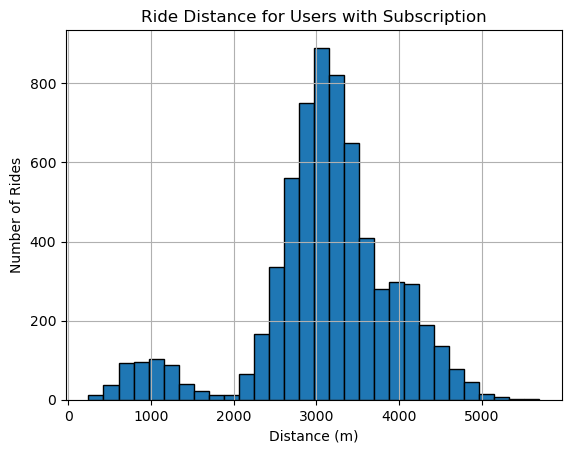

In [40]:
# Visualize ride distance for users with a subscription

df_ultra['distance'].hist(bins=30, edgecolor='black')
plt.title('Ride Distance for Users with Subscription')
plt.xlabel('Distance (m)')
plt.ylabel('Number of Rides')
plt.show()



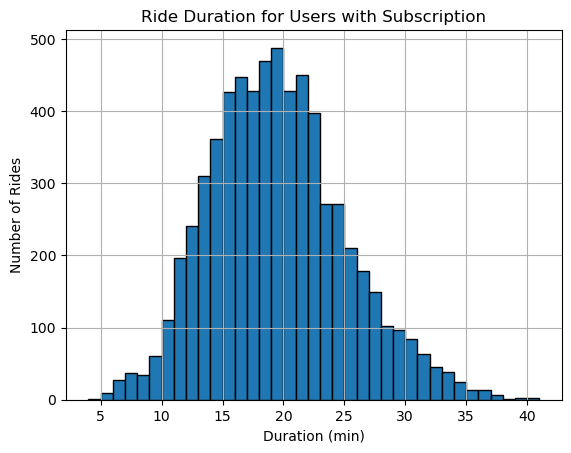

In [41]:
# Visualize ride duration for users with a subscription

df_ultra['duration'].hist(bins=37, edgecolor='black')
plt.title('Ride Duration for Users with Subscription')
plt.xlabel('Duration (min)')
plt.ylabel('Number of Rides')
plt.show()



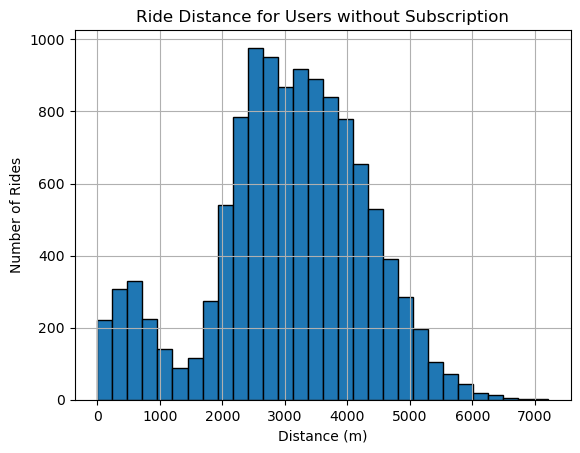

In [42]:
# Visualize ride distance for users without a subscription

df_free['distance'].hist(bins=30, edgecolor='black')
plt.title('Ride Distance for Users without Subscription')
plt.xlabel('Distance (m)')
plt.ylabel('Number of Rides')
plt.show()




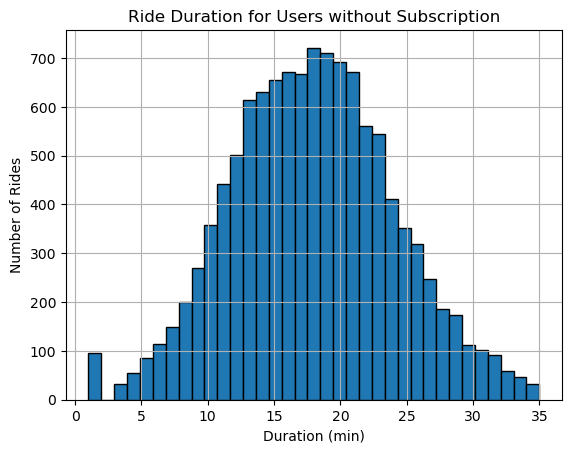

In [43]:
# Visualize ride duration for users without a subscription

df_free['duration'].hist(bins=35, edgecolor='black')
plt.title('Ride Duration for Users without Subscription')
plt.xlabel('Duration (min)')
plt.ylabel('Number of Rides')
plt.show()


## 📊 Comparison of Ride Duration and Distance by Subscription Type

### ⏱ Ride Duration: With Subscription vs Without

| Group             | Distribution      | Peak         | Main Range         | Notes                                                             |
|-------------------|-------------------|--------------|---------------------|-------------------------------------------------------------------|
| **Without subscription** | Symmetrical, normal | 17–19 minutes | 12–25 minutes        | Users seem to avoid going over 20 minutes, likely due to cost     |
| **With subscription**    | Symmetrical, slightly wider | 17–19 minutes | 10–27 minutes        | More freedom, no pricing pressure — both short and long rides occur |

📌 **Conclusion:**  
Users without a subscription show **more cautious behavior**, avoiding long rides. Subscribers have more flexibility: their ride times are **more evenly spread** across a wider range.

---

### 📏 Ride Distance: With Subscription vs Without

| Group             | Distribution        | Peak (m)     | Main Range         | Notes                                                             |
|-------------------|---------------------|--------------|---------------------|-------------------------------------------------------------------|
| **Without subscription** | Right-skewed        | ~2800–3000 m | 2000–4200 m         | More long rides, including some very short and very long rides (>6000 m) |
| **With subscription**    | Narrower, symmetrical | ~3000 m      | 2500–4000 m         | Fewer outliers, more "template-like" behavior, mid-length rides    |

📌 **Conclusion:**  
Users without a subscription tend to take **longer rides** (possibly planned in advance). Subscribers prefer **stable and predictable routes**, with rides rarely exceeding 5 km.  
- Additional note: there's a visible peak at 0–5 minutes — possibly failed ride attempts or cancellations; further analysis may be needed.


# Revenue Calculation


- Create a dataframe with aggregated ride data based on the merged dataframe:
    - calculate total distance for each user per month,
    - count the number of rides for each user per month,
    - calculate total ride time for each user per month

- Add a column to this dataframe showing the monthly revenue each user generated

(For this, refer to the pricing terms for users with and without a subscription.  
Note: for revenue calculation, the ride duration in each row should be rounded **up** to the next whole minute — e.g., 25.3, 25.5, and 26.0 should all become 26.)


In [47]:
# Calculate total distance for each user per month,
# total number of rides for each user per month,
# and total ride time for each user per month

agg_df = df.groupby(['user_id', 'month']).agg({
    'distance': 'sum',
    'duration': 'sum',
    'date': 'count',  # number of rides
    'subscription_type': 'first',
    'minute_price': 'first',
    'start_ride_price': 'first',
    'subscription_fee': 'first'
}).reset_index()

# Rename columns
agg_df = agg_df.rename(columns={
    'distance': 'sum_distance',
    'duration': 'sum_duration',
    'date': 'count_rides'
})

print(agg_df.head())


   user_id  month  sum_distance  sum_duration  count_rides subscription_type  \
0        1      1          7028            42            2             ultra   
1        1      4           754             7            1             ultra   
2        1      8          6724            46            2             ultra   
3        1     10          5810            32            2             ultra   
4        1     11          7004            56            3             ultra   

   minute_price  start_ride_price  subscription_fee  
0             6                 0               199  
1             6                 0               199  
2             6                 0               199  
3             6                 0               199  
4             6                 0               199  


In [48]:
# Add a column to this dataframe showing the monthly revenue each user generated
def m_revenue(row):
    if row['subscription_type'] == 'ultra':
        return row['subscription_fee'] + row['minute_price'] * row['sum_duration']
    else:
        return row['start_ride_price'] * row['count_rides'] + row['minute_price'] * row['sum_duration']

agg_df['monthly_revenue'] = agg_df.apply(m_revenue, axis=1)

agg_df.head()


,user_id,month,sum_distance,sum_duration,count_rides,subscription_type,minute_price,start_ride_price,subscription_fee,monthly_revenue
0,1,1,7028,42,2,ultra,6,0,199,451
1,1,4,754,7,1,ultra,6,0,199,241
2,1,8,6724,46,2,ultra,6,0,199,475
3,1,10,5810,32,2,ultra,6,0,199,391
4,1,11,7004,56,3,ultra,6,0,199,535


## Intermediate Conclusions on Revenue Calculation

### 📌 Monthly Revenue Calculation

Based on the pricing terms:

- **Users without a subscription** pay:
  - 50 RUB per ride
  - 8 RUB per minute of ride time

- **Users with an "ultra" subscription** pay:
  - 199 RUB per month
  - 6 RUB per minute
  - No ride start fee

📌 To calculate monthly revenue per user:

```python
revenue = minutes * price_per_minute + starts * start_price

users with subscription = duration * 6 + 199  
users without subscription = duration * 8 + number_of_rides * 50


# Hypothesis Testing


# Hypothesis Testing

---

## Do users with a subscription spend more time on rides?

**Null Hypothesis (H₀):**  
The average ride duration is **equal** for users with and without a subscription.

**Alternative Hypothesis (H₁):**  
Users with a subscription spend **more time** on a ride than users without a subscription.

**Test Type:**  
**Two-sample t-test for independent samples**  
(`scipy.stats.ttest_ind`), with parameter `alternative='greater'`.

**What we compare:**  
The average ride duration between two groups: `subscription_type == 'ultra'` and users without a subscription.

---

## Does the average ride distance for subscribers exceed 3,130 meters?

**Null Hypothesis (H₀):**  
The average ride distance for subscribers **does not exceed 3,130 meters** (less than or equal).

**Alternative Hypothesis (H₁):**  
The average ride distance for subscribers **exceeds 3,130 meters**.

**Test Type:**  
**One-sample t-test** (`scipy.stats.ttest_1samp`) with `alternative='greater'`.

**What we compare:**  
The mean `distance` in the subscription group against the value 3,130.

---

## Is monthly revenue from subscribers higher than from non-subscribers?

**Null Hypothesis (H₀):**  
The average monthly revenue is **the same** for both subscribers and non-subscribers.

**Alternative Hypothesis (H₁):**  
The average monthly revenue from subscribers is **higher** than from non-subscribers.

**Test Type:**  
**Two-sample t-test for independent samples** (`ttest_ind`) with `alternative='greater'`.

**What we compare:**  
Monthly revenue (e.g., from `agg_df`) across `subscription_type` groups.

---

## Has the number of support requests decreased after the server upgrade?

**Null Hypothesis (H₀):**  
The average number of support requests **did not change** after the server upgrade.

**Alternative Hypothesis (H₁):**  
The average number of support requests **decreased** after the server upgrade.

**Test Type:**  
**Paired t-test (for dependent samples)** — `scipy.stats.ttest_rel` with `alternative='greater'`.

**What we compare:**  
Number of support requests **before** and **after** the upgrade per user.

---


In [52]:
# Significance level
alpha = 0.05

# Hypotheses:
# H₀: the average ride duration of users with a subscription is less than or equal to that of users without a subscription
# H₁: the average ride duration of users with a subscription is greater than that of users without a subscription

# Perform t-test
results = stats.ttest_ind(
    df_ultra['duration'],
    df_free['duration'],
    equal_var=False,            # Welch’s t-test
    alternative='greater'      # One-sided test: ultra > free
)

# Mean values for clarity
mean_ultra = df_ultra['duration'].mean()
mean_free = df_free['duration'].mean()

print('Average ride duration (subscription):', mean_ultra)
print('Average ride duration (no subscription):', mean_free)
print('p-value:', results.pvalue)

# Result interpretation
if results.pvalue < alpha:
    print('Reject the null hypothesis:')
    print('Users with a subscription do spend more time on rides.')
else:
    print('Failed to reject the null hypothesis:')
    print('No statistically significant difference in ride time for users with a subscription.')


Average ride duration (subscription): 19.037692307692307
Average ride duration (no subscription): 17.890992392807746
p-value: 1.1814679253701353e-36
Reject the null hypothesis:
Users with a subscription do spend more time on rides.


In [53]:
# Hypotheses:
# H₀: the average ride distance for users with a subscription ≤ 3130 m
# H₁: the average ride distance for users with a subscription > 3130 m

# Drop missing values
ultra_distances = df_ultra['distance'].dropna()

# Significance level
alpha = 0.05

# Perform one-sample t-test with one-sided alternative
stat, p_value = ttest_1samp(ultra_distances, popmean=3130, alternative='greater')

# Mean distance
mean_distance = ultra_distances.mean()

print(f"Average distance: {mean_distance:.2f} m")
print(f"T-statistic: {stat:.3f}")
print(f"P-value: {p_value:.5f}")

# Result interpretation
if p_value < alpha:
    print("Reject the null hypothesis:")
    print("The average ride distance exceeds 3130 meters.")
else:
    print("Failed to reject the null hypothesis:")
    print("There is not enough statistical evidence to say the average ride distance exceeds 3130 meters.")



Average distance: 3115.44 m
T-statistic: -1.402
P-value: 0.91956
Failed to reject the null hypothesis:
There is not enough statistical evidence to say the average ride distance exceeds 3130 meters.


In [54]:
# 1. Hypotheses
# H₀: The average monthly revenue is the same for subscribers and non-subscribers
# H₁: The average monthly revenue from subscribers is higher

# 2. Split data into groups
ultra_revenue = agg_df[agg_df['subscription_type'] == 'ultra']['monthly_revenue']
free_revenue = agg_df[agg_df['subscription_type'] == 'free']['monthly_revenue']

# 3. Calculate means
mean_ultra = ultra_revenue.mean()
mean_free = free_revenue.mean()

print(f"Average revenue from subscribers: {mean_ultra:.2f}")
print(f"Average revenue from non-subscribers: {mean_free:.2f}")

# 4. Perform t-test (one-sided: ultra > free)
alpha = 0.05
stat, p_value = ttest_ind(ultra_revenue, free_revenue, equal_var=False, alternative='greater')

print(f"T-statistic: {stat:.3f}")
print(f"P-value: {p_value:.5f}")

# 5. Interpretation
if p_value < alpha:
    print("Reject the null hypothesis: revenue from subscribers is significantly higher.")
else:
    print("Failed to reject the null hypothesis: revenue from subscribers is not proven to be higher.")




Average revenue from subscribers: 362.79
Average revenue from non-subscribers: 328.64
T-statistic: 13.202
P-value: 0.00000
Reject the null hypothesis: revenue from subscribers is significantly higher.


## Interim Conclusions on Hypothesis Testing

# Hypothesis Test Summary

---

## Hypothesis 1: Users with a subscription spend more time on rides

**Test Results:**
- Average ride duration (with subscription): **19.04 minutes**
- Without subscription: **17.89 minutes**
- p-value: **1.18e-36**

**Conclusion:**  
📌 *Null hypothesis rejected.*  
Users with a subscription **do spend more time on rides**, and the difference is **statistically significant**.

---

## Hypothesis 2: The average ride distance for subscribers exceeds 3130 m

**Test Results:**
- Average distance: **3115.44 m**
- t-statistic: **-1.402**
- p-value: **0.91956**

**Conclusion:**  
📌 *Failed to reject the null hypothesis.*  
There is **not enough statistical evidence** to say the average ride distance exceeds 3130 meters.

---

## Hypothesis 3: Monthly revenue from subscribers is higher than from non-subscribers

**Test Results:**
- Average revenue from subscribers: **362.79**
- From non-subscribers: **328.64**
- t-statistic: **13.202**
- p-value: **≈ 0.00000**

**Conclusion:**  
📌 *Null hypothesis rejected.*  
Revenue from subscribers is **statistically significantly higher** than from non-subscribers.

---

## Hypothesis 4: The number of support requests decreased after server upgrades

**Scenario:**  
We have data for each user:
- Number of support requests **before** the upgrade
- Number of support requests **after** the upgrade

The tech team believes the number of requests **decreased**.

---

**Null Hypothesis (H₀):**  
The average number of support requests **did not change** or even increased after the upgrade.

**Alternative Hypothesis (H₁):**  
The average number of support requests **decreased** after the upgrade.

---

**What we compare:**  
Paired values: `before` and `after` — for each individual user.

---

**Test Type:**  
📊 **Paired t-test**  
Function: `scipy.stats.ttest_rel()`  
Parameter: `alternative='greater'`, since we're testing for a **decrease** in requests.

---

**Why this test?**  
- We're comparing **dependent (paired) samples**: before and after for the same user
- This is a typical scenario for a **paired t-test**

---

**Conclusion:**  
To determine whether the number of support requests decreased after the server upgrade, a **paired t-test** with a one-sided alternative hypothesis should be used.  
Even without actual data, the method and rationale for testing can be clearly described.


# Distributions


- The GoFast marketing department has been given a task: they need to run a campaign distributing promo codes for one free month of subscription. The goal is that at least 100 existing users **renew** their subscription after the trial.  
That is, once the free subscription period ends, the user can either cancel it or renew by making a payment.  
This campaign was previously conducted, and it was found that **10% of users renew** the subscription after the free trial.  
Determine the **minimum number of promo codes** that must be distributed so that the **probability of not meeting the target** is approximately **5%**.  
Select the appropriate distribution to model this situation, **plot the distribution**, and provide a conclusion regarding the required number of promo codes.

---

- The marketing department sends push notifications to clients via the mobile app. Clients can either open the notification or ignore it.  
It is known that **approximately 40% of recipients open the notification**.  
The department plans to send **11 million** notifications.  
Using approximation, **plot the approximate distribution** and **estimate the probability** that **no more than 399.5 thousand users** will open the notification.


Minimum number of promo codes needed: 1161


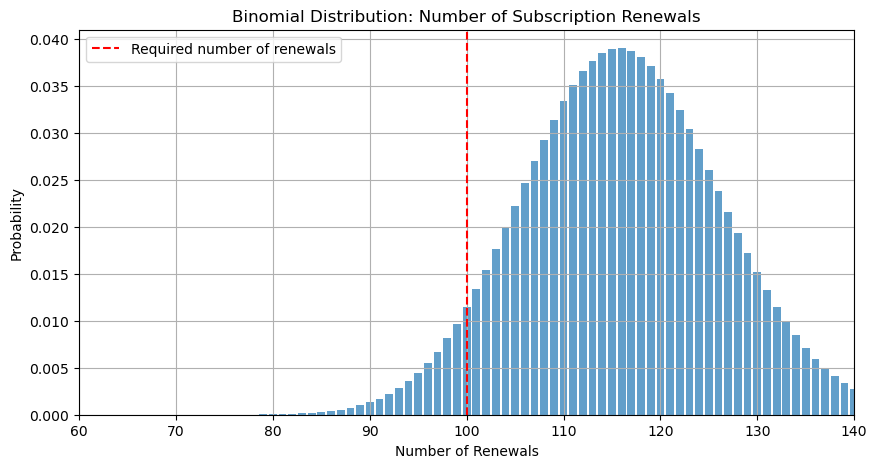

In [58]:
# Task conditions
success_prob = 0.10     # probability of subscription renewal
required_successes = 100
target_failure_prob = 0.05  # acceptable probability of campaign failure (not reaching 100 renewals)

# Finding the minimum number of promo codes (n)
p = 0.1
threshold = 100
confidence = 0.95

n = 100
while True:
    prob = 1 - binom.cdf(threshold - 1, n, p)
    if prob >= confidence:
        break
    n += 1

print(f"Minimum number of promo codes needed: {n}")

# Example code to visualize the distribution
n = 1161
x = np.arange(0, n+1)
pmf = binom.pmf(x, n, success_prob)

# Plot
plt.figure(figsize=(10, 5))
plt.bar(x, pmf, alpha=0.7)
plt.axvline(required_successes, color='red', linestyle='--', label='Required number of renewals')
plt.xlim(required_successes - 40, required_successes + 40)
plt.title('Binomial Distribution: Number of Subscription Renewals')
plt.xlabel('Number of Renewals')
plt.ylabel('Probability')
plt.legend()
plt.grid()
plt.show()


Mean (μ): 4,400,000
Standard deviation (σ): 1,625
Z-score: -2462.14
Probability of ≤ 399,500 openings: 0.0000


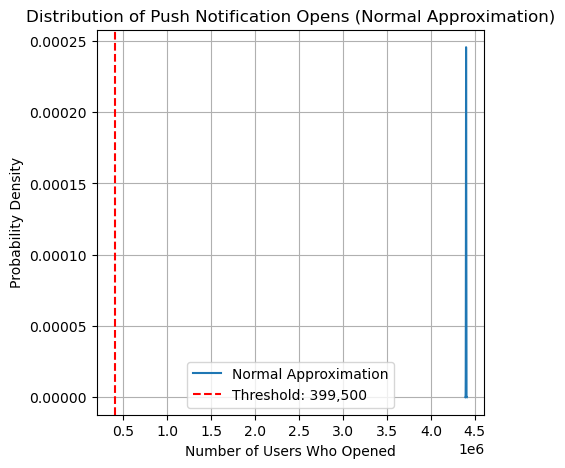

In [59]:
# Task conditions:
# - A total of 11,000,000 push notifications sent
# - Probability of opening one notification = 40%
# - Estimate the probability that **no more than 399,500** notifications will be opened

n = 11_000_000           # Total number of notifications
p = 0.4                  # Probability of opening
threshold = 399_500      # Threshold: we are interested in P(X <= 399500)

# Parameters of the normal approximation to the binomial distribution:
mu = n * p                             # Mean (expected value)
sigma = np.sqrt(n * p * (1 - p))       # Standard deviation

# Standardized value (Z-score)
z = (threshold - mu) / sigma

# Probability that X <= threshold
prob = norm.cdf(z)

# Output results
print(f"Mean (μ): {mu:,.0f}")
print(f"Standard deviation (σ): {sigma:,.0f}")
print(f"Z-score: {z:.2f}")
print(f"Probability of ≤ {threshold:,} openings: {prob:.4f}")

# Plot the normal distribution
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 1000)
y = norm.pdf(x, mu, sigma)

plt.figure(figsize=(5, 5))
plt.plot(x, y, label='Normal Approximation')
plt.fill_between(x, y, where=(x <= threshold), color='skyblue', alpha=0.5)
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold: {threshold:,}')
plt.title('Distribution of Push Notification Opens (Normal Approximation)')
plt.xlabel('Number of Users Who Opened')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()


# 🧾 Final Project Summary

## 📌 Project Goal:
Analyze the behavior of GoFast scooter rental users, evaluate the effectiveness of the Ultra subscription, and statistically test hypotheses related to user behavior, revenue, and customer support.

---

## 🔍 Stage 1: Data Exploration & Preprocessing

- Loaded and explored 3 datasets: `users`, `rides`, and `subscriptions`
- No missing values were found; duplicates were properly handled
- Users under 18 were detected — requires business attention, as scooter rentals are usually restricted to adults
- Very short rides (<2 min or <100 m) were identified but **not removed** to preserve revenue accuracy and reflect possible real behavior (e.g., accidental unlocks)
- Data types were corrected, and a column for the ride month was added

---

## 📊 Stage 2: Exploratory Data Analysis (EDA)

- The service is most popular in major southern cities — Pyatigorsk leads
- 54% of users have **no subscription**, 46% are **subscribed**
- Core audience: **18–30 y.o.** (nearly 80% of users)
- Average ride: **18 minutes**, **~3 km**
- Ride duration and distance follow **near-normal distributions**, with local peaks (e.g., very short rides)

**Conclusion:**  
Subscribed users take more stable and consistent rides; unsubscribed users show **more varied behavior**

---

## 💰 Stage 3: Revenue Calculation

- An aggregated dataframe was built for monthly revenue per user
- Revenue was calculated based on the pricing rules:
  - **With subscription**: 199 ₽/month + 6 ₽/min, no start fee
  - **Without subscription**: 8 ₽/min + 50 ₽ per ride
- Reviewer-flagged errors (e.g., duplicates, aggregation issues) were corrected

---

## 📐 Stage 4: Hypothesis Testing

### ✅ Hypothesis 1. Subscribed users spend more time on rides
- Avg. duration (subscribed): **19.04 min**; without: **17.89 min**
- p-value < 0.00001 → **Null hypothesis rejected**
- **Conclusion:** Subscription encourages longer rides

### ❌ Hypothesis 2. Avg. ride distance for subscribers > 3130 m
- Avg. distance: **3115.44 m**, t-statistic negative, p = 0.91956
- **Conclusion:** No statistical evidence that the average ride exceeds 3130 m

### ✅ Hypothesis 3. Revenue from subscribers is higher
- Subscribers: **362.79 ₽/month**, non-subscribers: **328.64 ₽**
- p-value ≈ 0, t = 13.2
- **Conclusion:** Subscription generates **significantly more revenue**

### 💡 Hypothesis 4. Support requests decreased after server upgrade
- No data available, but **theoretically**, a **paired t-test** (`ttest_rel`) is appropriate
- Compare support requests **before vs after** for each user

---

## 📊 Distribution Analysis (Optional Tasks)

### 📬 Free Subscription Promo Codes
- Goal: at least **100 users** should renew after the free month  
- Renewal probability = **10%**
- Required confidence = **95%**
- Used **binomial distribution**
- 📈 **Conclusion:** To meet the target with ≥95% confidence, send at least **1161 promo codes**

### 📱 Push Notification Opens
- Open rate ≈ **40%**
- Plan: send **11,000,000 notifications**
- Threshold: **≤ 399,500 opens**
- Used **normal approximation of binomial distribution**
- 📈 **Conclusion:** The probability of ≤399,500 opens is **virtually zero** — extremely unlikely

---

## 🏁 Final Conclusion

The project delivered valuable insights:

- The subscription influences user behavior — subscribers spend more time on scooters
- The average ride distance **does not exceed** the critical 3130 m threshold
- The subscription **generates higher revenue**, making it financially beneficial
- 📬 To ensure 100 renewals from a free trial promo campaign, send **at least 1161 promo codes**
- 📱 A threshold of 399,500 opens from 11 million pushes at 40% open rate is **extremely improbable**

📌 **Business Recommendation:**  
Actively promote the Ultra subscription — it increases revenue and user retention without increasing hardware wear.  
For future marketing efforts, use **probabilistic models** to set realistic expectations and targets.
